In [8]:
pip install seaborn



     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
print(os.listdir('C:\\Users\\shris\\OneDrive\\Desktop\\IDS'))

['.ipynb_checkpoints', 'dataset.csv', 'main.ipynb', 'NUSW-NB15_features.csv', 'UNSW-NB15_LIST_EVENTS.csv', 'Untitled.ipynb']


In [4]:
path = "C:\\Users\\shris\\OneDrive\\Desktop\\IDS\\dataset.csv"
df = pd.read_csv(path)

#Adding Attack Type column
#df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head(20)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
5,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,...,1,40,0,0,0,2,39,0,Normal,0
6,0.637109,tcp,-,FIN,10,8,534,354,26.683033,254,...,1,40,0,0,0,1,39,0,Normal,0
7,0.521584,tcp,-,FIN,10,8,534,354,32.593026,254,...,1,40,0,0,0,3,39,0,Normal,0
8,0.542905,tcp,-,FIN,10,8,534,354,31.313031,254,...,1,40,0,0,0,3,39,0,Normal,0
9,0.258687,tcp,-,FIN,10,6,534,268,57.985135,254,...,1,40,0,0,0,3,39,0,Normal,0


In [5]:
df.shape


(257671, 44)

In [6]:
df['attack_cat'].value_counts()

Normal            92998
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [7]:
df.dtypes

dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [8]:
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [9]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('attack_cat')
#cate_cols.remove('label')

cate_cols

['state', 'proto', 'service']

In [10]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar",figsize=(30,10))

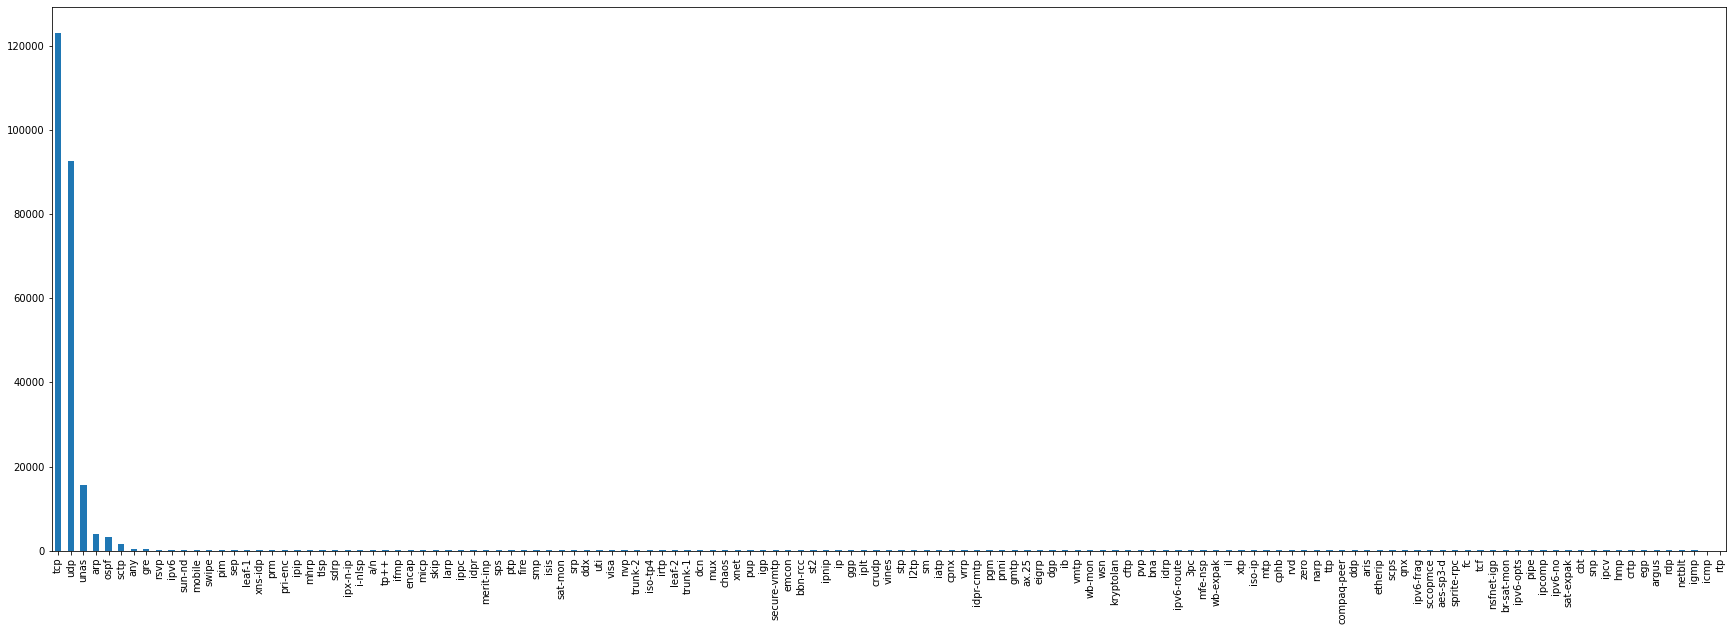

In [11]:
bar_graph('proto')

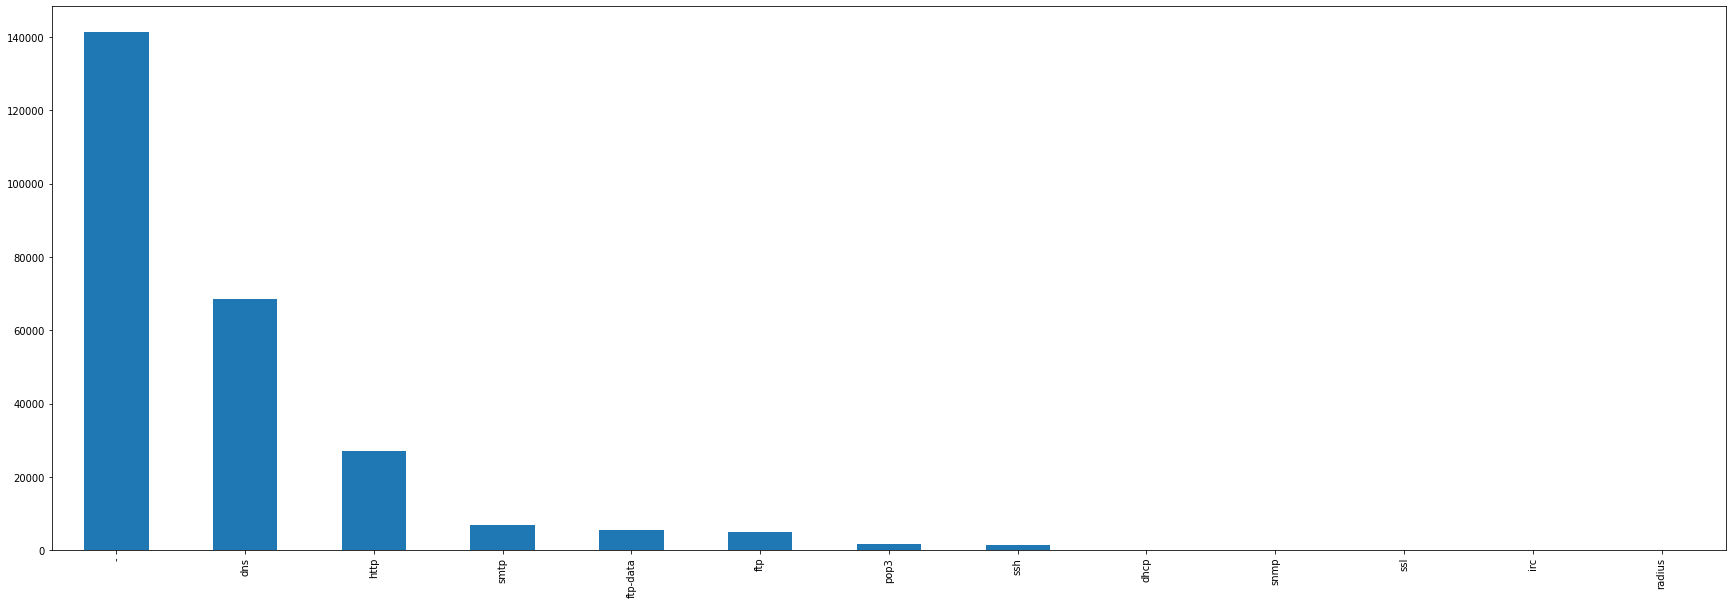

In [12]:
plt.figure(figsize=(15,3))
bar_graph('service')

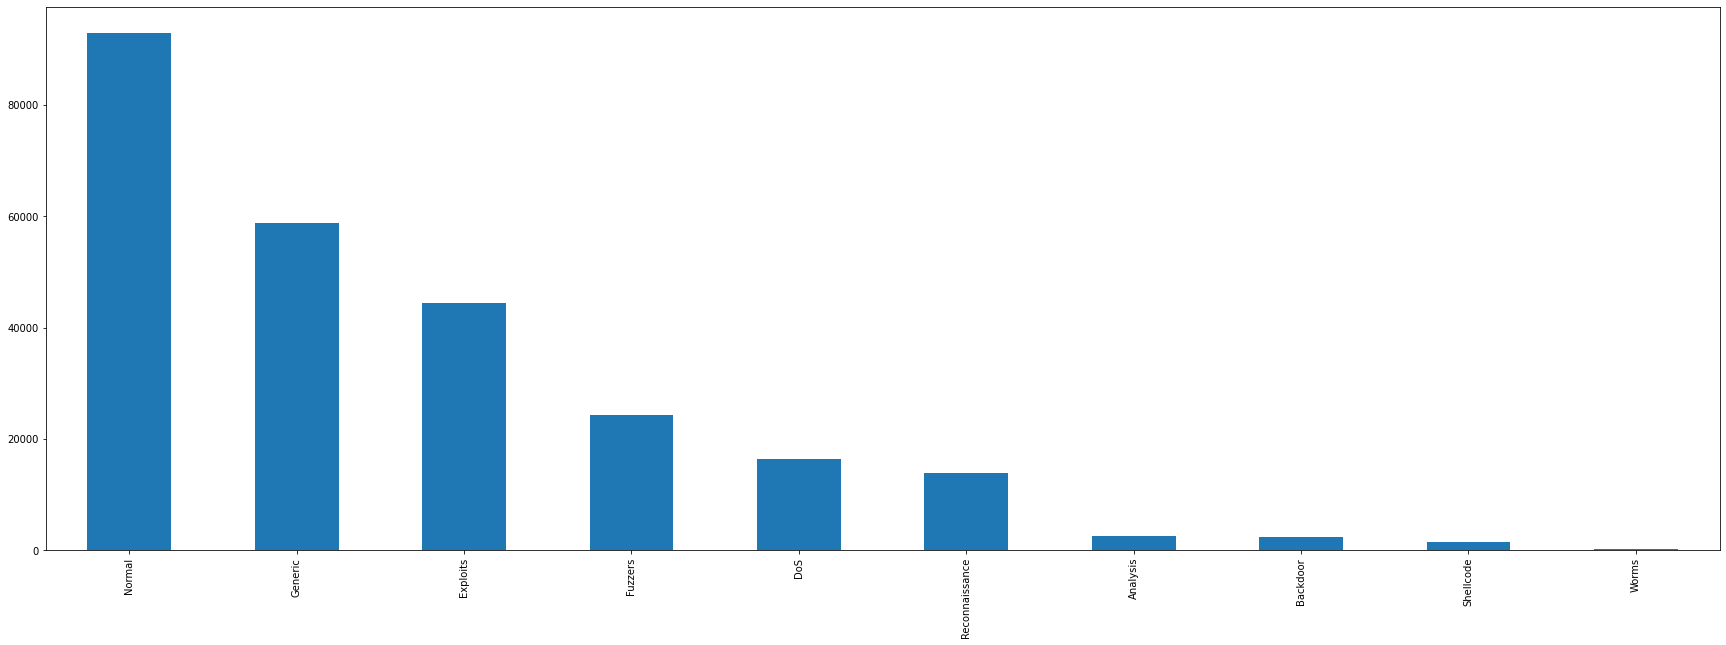

In [13]:
bar_graph('attack_cat')

In [14]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

C:\Users\shris\AppData\Local\Temp\ipykernel_10916\4162482413.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


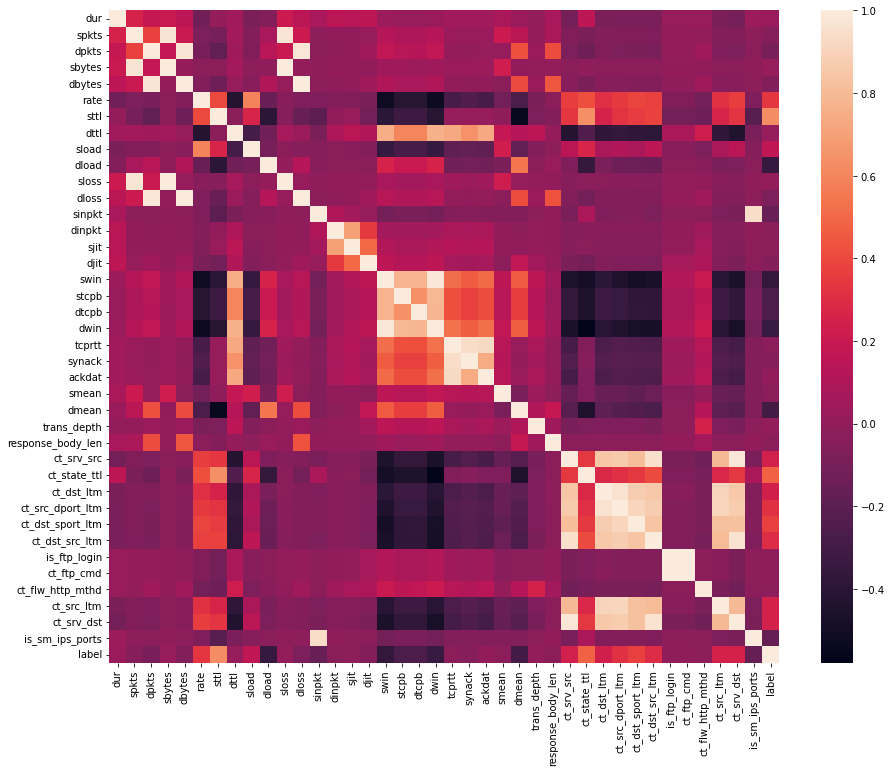

In [15]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [16]:
df['sbytes'].corr(df['spkts'])

0.964393240941368

In [17]:
df['dbytes'].corr(df['dpkts'])

0.9734453415451612

In [18]:
df['sloss'].corr(df['spkts'])

0.9718594216401752

In [19]:
df['sloss'].corr(df['sbytes'])

0.9957715797462122

In [20]:
df['dloss'].corr(df['dpkts'])

0.9796120876591013

In [21]:
df['dloss'].corr(df['dbytes'])

0.9967111363708732

In [22]:
df['dwin'].corr(df['swin'])

0.9804582943265966

In [23]:
df['ct_ftp_cmd'].corr(df['is_ftp_login'])

0.9988554881853081

In [24]:
df['ct_srv_dst'].corr(df['ct_srv_src'])

0.9794667463419459

In [25]:
df['is_sm_ips_ports'].corr(df['sinpkt'])

0.9421206165823315

In [26]:
df['ct_srv_dst'].corr(df['ct_dst_src_ltm'])

0.9603211084349521

In [27]:

df.drop('dbytes',axis = 1,inplace = True)


df.drop('sloss',axis = 1,inplace = True)

df.drop('dloss',axis = 1, inplace=True)


df.drop('dwin',axis = 1, inplace=True)


df.drop('ct_ftp_cmd',axis = 1, inplace=True)





In [28]:
df.drop('ct_srv_dst',axis = 1, inplace=True)

In [29]:
df.head(20)

,dur,proto,service,state,spkts,dpkts,sbytes,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,74.087490,252,254,...,1,1,1,1,0,0,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,78.473372,62,252,...,1,1,1,2,0,0,1,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,14.170161,62,252,...,2,1,1,3,0,0,2,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,13.677108,62,252,...,2,1,1,3,1,0,2,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,33.373826,254,252,...,2,2,1,40,0,0,2,0,Normal,0
5,0.380537,tcp,-,FIN,10,6,534,39.417980,254,252,...,2,2,1,40,0,0,2,0,Normal,0
6,0.637109,tcp,-,FIN,10,8,534,26.683033,254,252,...,1,1,1,40,0,0,1,0,Normal,0
7,0.521584,tcp,-,FIN,10,8,534,32.593026,254,252,...,3,3,1,40,0,0,3,0,Normal,0
8,0.542905,tcp,-,FIN,10,8,534,31.313031,254,252,...,3,3,1,40,0,0,3,0,Normal,0
9,0.258687,tcp,-,FIN,10,6,534,57.985135,254,252,...,3,3,1,40,0,0,3,0,Normal,0


In [30]:
df.shape

(257671, 38)

In [31]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'rate',
       'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'ct_src_ltm',
       'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [32]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

C:\Users\shris\AppData\Local\Temp\ipykernel_10916\1261043509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = df.std()


ackdat               4.577077e-02
synack               5.385654e-02
tcprtt               9.290861e-02
is_ftp_login         1.160912e-01
is_sm_ips_ports      1.186184e-01
label                4.802676e-01
ct_flw_http_mthd     6.818562e-01
trans_depth          7.105955e-01
ct_state_ttl         9.922968e-01
ct_dst_sport_ltm     5.831532e+00
dur                  5.974328e+00
ct_src_dport_ltm     8.160847e+00
ct_dst_ltm           8.173771e+00
ct_src_ltm           8.396286e+00
ct_srv_src           1.082973e+01
ct_dst_src_ltm       1.112078e+01
sttl                 1.024883e+02
dpkts                1.119864e+02
dttl                 1.127623e+02
swin                 1.273675e+02
spkts                1.359477e+02
smean                2.059018e+02
dmean                2.540418e+02
dinpkt               1.094053e+03
djit                 3.930168e+03
sinpkt               6.922180e+03
sjit                 4.903468e+04
response_body_len    4.962543e+04
rate                 1.603451e+05
sbytes        

In [33]:
df['proto'].value_counts()

tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
rdp          131
netblt       131
igmp          48
icmp          13
rtp            1
Name: proto, Length: 133, dtype: int64

In [34]:
df['proto'] = df['proto'].astype('category')

df['proto'] = df['proto'].cat.codes
df

,dur,proto,service,state,spkts,dpkts,sbytes,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label
0,0.121478,113,-,FIN,6,4,258,74.087490,252,254,...,1,1,1,1,0,0,1,0,Normal,0
1,0.649902,113,-,FIN,14,38,734,78.473372,62,252,...,1,1,1,2,0,0,1,0,Normal,0
2,1.623129,113,-,FIN,8,16,364,14.170161,62,252,...,2,1,1,3,0,0,2,0,Normal,0
3,1.681642,113,ftp,FIN,12,12,628,13.677108,62,252,...,2,1,1,3,1,0,2,0,Normal,0
4,0.449454,113,-,FIN,10,6,534,33.373826,254,252,...,2,2,1,40,0,0,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257666,0.000005,119,-,INT,2,0,104,200000.005100,254,0,...,2,1,1,2,0,0,2,0,Normal,0
257667,1.106101,113,-,FIN,20,8,18062,24.410067,254,252,...,2,1,1,1,0,0,3,0,Normal,0
257668,0.000000,6,-,INT,1,0,46,0.000000,0,0,...,1,1,1,1,0,0,1,1,Normal,0
257669,0.000000,6,-,INT,1,0,46,0.000000,0,0,...,1,1,1,1,0,0,1,1,Normal,0


In [35]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
df['state'].value_counts()

FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
no          1
CLO         1
Name: state, dtype: int64

In [37]:
smap = {'FIN':0,'INT':1,'CON':2,'REQ':3,'RST':4,'ECO':5 ,'ACC':6 ,'PAR':7,'URN':8,'no':9 ,'CLO':10}
df['state'] = df['state'].map(smap)

In [38]:
df.head(10)

,dur,proto,service,state,spkts,dpkts,sbytes,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label
0,0.121478,113,-,0,6,4,258,74.087490,252,254,...,1,1,1,1,0,0,1,0,Normal,0
1,0.649902,113,-,0,14,38,734,78.473372,62,252,...,1,1,1,2,0,0,1,0,Normal,0
2,1.623129,113,-,0,8,16,364,14.170161,62,252,...,2,1,1,3,0,0,2,0,Normal,0
3,1.681642,113,ftp,0,12,12,628,13.677108,62,252,...,2,1,1,3,1,0,2,0,Normal,0
4,0.449454,113,-,0,10,6,534,33.373826,254,252,...,2,2,1,40,0,0,2,0,Normal,0
5,0.380537,113,-,0,10,6,534,39.417980,254,252,...,2,2,1,40,0,0,2,0,Normal,0
6,0.637109,113,-,0,10,8,534,26.683033,254,252,...,1,1,1,40,0,0,1,0,Normal,0
7,0.521584,113,-,0,10,8,534,32.593026,254,252,...,3,3,1,40,0,0,3,0,Normal,0
8,0.542905,113,-,0,10,8,534,31.313031,254,252,...,3,3,1,40,0,0,3,0,Normal,0
9,0.258687,113,-,0,10,6,534,57.985135,254,252,...,3,3,1,40,0,0,3,0,Normal,0


In [39]:
df.drop('service',axis = 1,inplace= True)


In [40]:
df.head()

,dur,proto,state,spkts,dpkts,sbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,6,4,258,74.087490,252,254,14158.942380,...,1,1,1,1,0,0,1,0,Normal,0
1,0.649902,113,0,14,38,734,78.473372,62,252,8395.112305,...,1,1,1,2,0,0,1,0,Normal,0
2,1.623129,113,0,8,16,364,14.170161,62,252,1572.271851,...,2,1,1,3,0,0,2,0,Normal,0
3,1.681642,113,0,12,12,628,13.677108,62,252,2740.178955,...,2,1,1,3,1,0,2,0,Normal,0
4,0.449454,113,0,10,6,534,33.373826,254,252,8561.499023,...,2,2,1,40,0,0,2,0,Normal,0


In [41]:
df.shape

(257671, 37)

In [42]:
df.shape


(257671, 37)

In [43]:
df.dtypes

dur                  float64
proto                  int16
state                  int64
spkts                  int64
dpkts                  int64
sbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_ltm       int64
ct_dst_src_ltm         int64
is_ftp_login           int64
ct_flw_http_mthd       int64
ct_src_ltm             int64
is_sm_ips_port

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [45]:

print(df.shape)

y = df[['attack_cat']]
X = df.drop(['attack_cat',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(257671, 37)
(172639, 36) (85032, 36)
(172639, 1) (85032, 1)


# SVM

In [46]:
from sklearn.svm import SVC

In [47]:
clfs = SVC(gamma = 'scale')

In [48]:
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [49]:
print("Training time: ",end_time-start_time)

Training time:  1371.2446959018707


In [50]:
start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()

In [51]:
print("Testing time: ",end_time-start_time)

Testing time:  4232.489692211151


In [52]:
print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:",clfs.score(X_test,y_test))

Train score is: 0.8339714664704962
Test score is: 0.8324395521685953


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clfr = RandomForestClassifier(n_estimators=30)

In [55]:
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()

In [56]:
print("Training time: ",end_time-start_time)

Training time:  13.303570747375488


In [58]:
start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()

In [59]:
print("Testing time: ",end_time-start_time)

Testing time:  1.0973145961761475


In [60]:
print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:",clfr.score(X_test,y_test))

Train score is: 0.9187958688361263
Test score is: 0.8722833756703359


<BarContainer object of 2 artists>

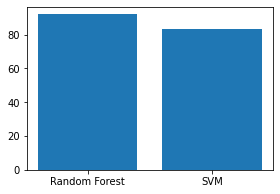

In [61]:
names = ['Random Forest','SVM']
values = [91.87,83.39]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

<BarContainer object of 2 artists>

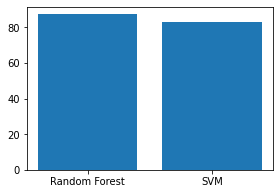

In [62]:
names = ['Random Forest','SVM']
values = [87.22,83.24]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)